# Coupling nwpy.fuelcycle and nwpy.footprint

Milos Atz

Nuclear Waste Management Group, University of California, Berkeley

2018-11-09

This notebook demonstrates the calculation of the area required per package in a constant-contact geological repository. The spacing between packages, which are arrange in a square array, is subject to repository thermal constraints. In this notebook, the decay heat load of the packages is determined using the `nwpy.fuelcycle` package.

In [6]:
import nwpy
#from nwpy.fuelcycle import fuelcycle
from nwpy.fuelcycle import stage
#from nwpy.fuelcycle.plot import TimePlot as tp
from nwpy import repository
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'repository' from 'nwpy' (/Users/harukowainwright/Documents/Projects/Chloe/Codes/nwpy_code/notebooks/nwpy/__init__.py)

In [ ]:
%matplotlib inline

### Specify fuel cycle or fuel cycle stage

In [2]:
# # FOR FUEL CYCLE
# # instantiate fuel cycle object
# fc = fuelcycle.FuelCycle('eg01')
# # run scale to determine waste properties; returns dictionary
# w = fc.discharge_wastes()

In [3]:
# FOR STAGE
# instantiate stage object
eg01_1 = stage.Stage('eg01', 1)
# run scale to determine waste properties; returns Stream or list of Streams
w_eg01 = eg01_1.discharge_all_wastes()

NameError: name 'stage' is not defined

In [5]:
eg23_1 = stage.Stage('eg23', 1)
w_eg23 = eg23_1.discharge_all_wastes()

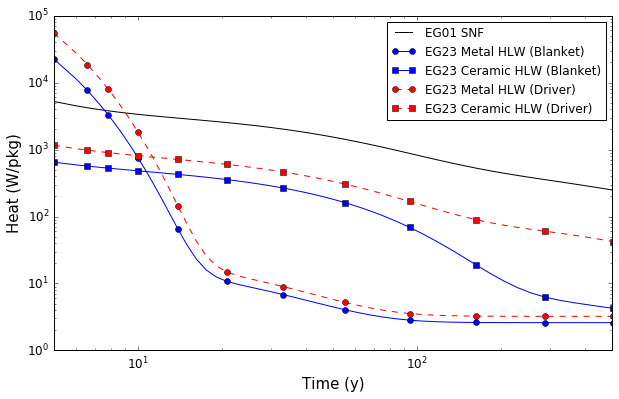

In [6]:
tp.plot(w_eg01, 'heat', color='k', label='EG01 SNF')
tp.plot(w_eg23[0], 'heat', color='b', marker='o', markevery=5, label='EG23 Metal HLW (Blanket)')
tp.plot(w_eg23[1], 'heat', color='b', marker='s', markevery=5, label='EG23 Ceramic HLW (Blanket)')
tp.plot(w_eg23[2], 'heat', color='r', linestyle='--', marker='o', markevery=5, label='EG23 Metal HLW (Driver)')
tp.plot(w_eg23[3], 'heat', color='r', linestyle='--', marker='s', markevery=5, label='EG23 Ceramic HLW (Driver)')
tp.set_log('x', 'y')
tp.xlim([0, 500])
tp.ylim(ymin=1)
plt.xlabel('Time (y)', fontsize=15)
plt.ylabel('Heat (W/pkg)', fontsize=15)
plt.legend(loc=0)#bbox_to_anchor=(1.7, 0.75))
fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks()+ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
plt.savefig('heat.png', format='png', dpi=900)

In [18]:
print('EG01 SNF: '+str(int(np.ceil(w_eg01.number)))+' packages')
print('EG23 Metal HLW (Blanket): '+str(int(np.ceil(w_eg23[0].number)))+' packages')
print('EG23 Ceramic HLW (Blanket): '+str(int(np.ceil(w_eg23[1].number)))+' packages')
print('EG23 Metal HLW (Driver): '+str(int(np.ceil(w_eg23[2].number)))+' packages')
print('EG23 Ceramic HLW (Driver): '+str(int(np.ceil(w_eg23[3].number)))+' packages')

EG01 SNF: 1192 packages
EG23 Metal HLW (Blanket): 1 packages
EG23 Ceramic HLW (Blanket): 201 packages
EG23 Metal HLW (Driver): 13 packages
EG23 Ceramic HLW (Driver): 2513 packages


In [20]:
w_eg23[0].form = w_eg23[0].form+'-blanket'
w_eg23[1].form = w_eg23[1].form+'-blanket'
w_eg23[2].form = w_eg23[2].form+'-driver'
w_eg23[3].form = w_eg23[3].form+'-driver'

In [21]:
wastes = [w_eg01, w_eg23[0], w_eg23[1], w_eg23[2], w_eg23[3]]

### Specify repository properties

In [34]:
# rock type
rock_type = 'granite'
# instantiate repository 
c = repository.Array(rock_type)

In [11]:
# for w in wastes:
#     c.load_waste_from_stream(w)
#     for st in [0.0, 20.0, 40.0, 60.0, 80.0, 100.0]:
#         c.update_st(st)
#         app = c.calculate_app(log=True)
#         print(w.evaluationgroup+'-'+str(w.stagenumber)+'_'+w.form+'\t'+str(st)+'\t'+str(app)+'\t'+str(w.number))

In [12]:
# w = wastes[-1]
# c.load_waste_from_stream(w)
# for st in [0.0, 20.0, 40.0, 60.0, 80.0, 100.0]:
#     c.update_st(st)
#     app = c.calculate_app(log=True)
#     print(w.evaluationgroup+'-'+str(w.stagenumber)+'_'+w.form+'\t'+str(st)+'\t'+str(app)+'\t'+str(w.number))

In [8]:
app = {}
app['eg01'] = {}
app['eg01']['snf'] = [0.0, 0.0, 0.0, 285.746415722, 115.575075226, 68.3227722308]
app['eg23'] = {}
app['eg23']['metal-blanket'] = [0.0, 4.9508568, 4.9508568, 4.9508568, 4.9508568, 4.9508568]
app['eg23']['ceramic-blanket'] = [43.3753939659, 12.6365337358, 8.24976810775, 7.2667272, 7.2667272, 7.2667272]
app['eg23']['metal-driver'] = [0.0, 4.9508568, 4.9508568, 4.9508568, 4.9508568, 4.9508568]
app['eg23']['ceramic-driver'] = [0.0, 43.5939097162, 19.5479665372, 11.723570344, 8.12105109202, 7.2667272]

In [9]:
pkgs = {}
pkgs['eg01'] = {}
pkgs['eg01']['snf'] = 1192
pkgs['eg23'] = {}
pkgs['eg23']['metal-blanket'] = 1
pkgs['eg23']['ceramic-blanket'] = 201
pkgs['eg23']['metal-driver'] = 13
pkgs['eg23']['ceramic-driver'] = 2513

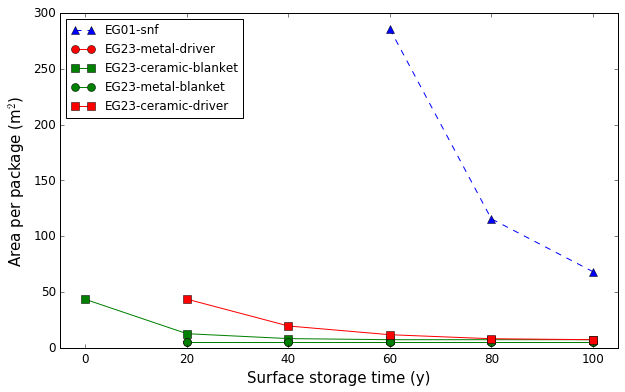

In [150]:
linestyle = {'eg01':'--', 'eg23':'-'}
color = {'snf':'b', 'blanket':'g', 'driver':'r'}
marker = {'snf':'^', 'metal':'o', 'ceramic':'s'}
st = [0.0, 20.0, 40.0, 60.0, 80.0, 100.0]
for fci in xrange(0, len(app)):
    fc = app.keys()[::-1][fci]
    for wf in app[fc]:
        x = [st[i] for i in xrange(0, len(st)) if app[fc][wf][i]!=0.0]
        y = [val for val in app[fc][wf] if val!=0.0]
        l = linestyle[fc] 
        m = marker[marker.keys()[np.where([i in wf for i in marker.keys()])[0][0]]]
        c = color[color.keys()[np.where([i in wf for i in color.keys()])[0][0]]]
        plt.plot(x, y, color=c, marker=m, linestyle=l, markersize=8, label=fc.upper()+'-'+wf)
plt.xlabel('Surface storage time (y)', fontsize=15)
plt.ylabel(r'Area per package (m$^2$)', fontsize=15)
plt.xlim([-5, 105])
plt.legend(loc=2)#, fontsize=15)
fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks()+ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
plt.savefig('app.png', format='png', dpi=900)

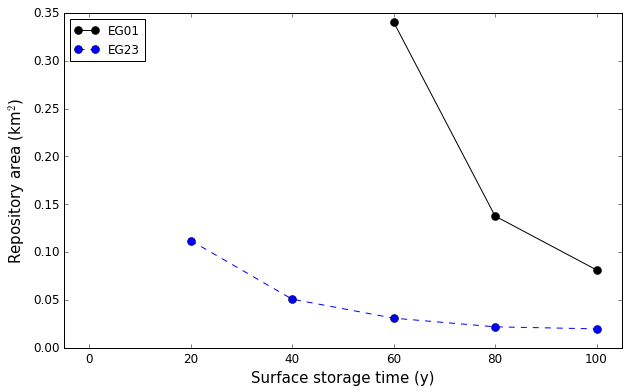

In [10]:
linestyle = {'eg01':'-', 'eg23':'--'}
color = {'eg01':'k', 'eg23':'b'}
st = [0.0, 20.0, 40.0, 60.0, 80.0, 100.0]
for fci in xrange(0, len(app)):
    fc = app.keys()[::-1][fci]
    x = []
    y = []
    for ti in xrange(0, len(st)):
        if(not any(app[fc][wf][ti]==0 for wf in app[fc])):
            x.append(st[ti])
            area = sum([app[fc][wf][ti]*pkgs[fc][wf] for wf in app[fc]])/1e6
            y.append(area)
    plt.plot(x, y, marker='o', markersize=8, linestyle=linestyle[fc], color=color[fc], label=fc.upper())
plt.xlabel('Surface storage time (y)', fontsize=15)
plt.ylabel(r'Repository area (km$^2$)', fontsize=15)
plt.xlim([-5, 105])
plt.legend(loc=2)#, fontsize=15)
fig = plt.gcf()
fig.set_size_inches(10, 6)
ax = plt.gca()
for tick in ax.xaxis.get_major_ticks()+ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
# plt.show()
plt.savefig('area.png', format='png', dpi=900)